# Trip S&S

Maps for <https://mexico.werthmuller.org/besucherreisen/simon>.

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import travelmaps2 as tm
from matplotlib import pyplot as plt
tm.setup(dpi=200)

### 1. Map

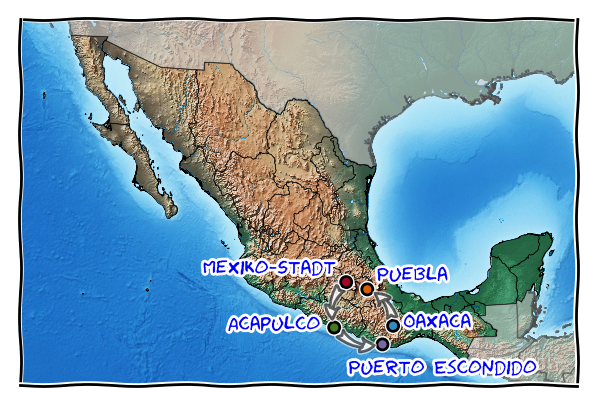

In [2]:
fig_x = tm.plt.figure(figsize=(tm.cm2in([11, 6])))

# Locations
MDF = [19.433333, -99.133333] # Mexico City
OAX = [16.898056, -96.414167] # Oaxaca
PES = [15.861944, -97.067222] # Puerto Escondido
ACA = [16.863611, -99.8825]   # Acapulco
PBL = [19., -97.883333]       # Puebla

# Create basemap
m_x = tm.Basemap(width=3500000, height=2300000, resolution='c',  projection='tmerc', lat_0=24, lon_0=-102)

# Plot image
###m_x.warpimage('./data/TravelMap/HYP_HR_SR_OB_DR/HYP_HR_SR_OB_DR.tif')

# Put a shade over non-Mexican countries
countries = ['USA', 'BLZ', 'GTM', 'HND', 'SLV', 'NIC', 'CUB']
tm.country(countries, m_x, fc='.8', ec='.3', lw=.5, alpha=.6)

# Fill states
fcs = 32*['none']
ecs = 32*['k']
lws = 32*[.2,]
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)
ecs = 32*['none']
#ecs[19] = 'r'
lws = 32*[1,]
tm.country('MEX', bmap=m_x, fc=fcs, ec=ecs, lw=lws, adm=1)

# Add arrows
tm.arrow(MDF, ACA, m_x, rad=.3)
tm.arrow(ACA, PES, m_x, rad=.3)
#tm.arrow(PES, OAX, m_x, rad=-.3)
tm.arrow(OAX, PBL, m_x, rad=.3)
#tm.arrow(PBL, MDF, m_x, rad=.3)

# Add visited cities
tm.city(OAX, 'Oaxaca', m_x, offs=[.6, 0])
tm.city(MDF, 'Mexiko-Stadt', m_x, offs=[-.6, .6], halign="right")
tm.city(PES, 'Puerto Escondido', m_x, offs=[-2, -1.5])
tm.city(ACA, 'Acapulco', m_x, offs=[-.8, 0], halign="right")
tm.city(PBL, 'Puebla', m_x, offs=[.6, .6])

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/simon/'
#tm.plt.savefig(fpath+'MapSSTrip.png', bbox_inches='tight')
tm.plt.show()

### 2. Profile

Route drawn in Google Maps and converted in <http://www.gpsvisualizer.com>.

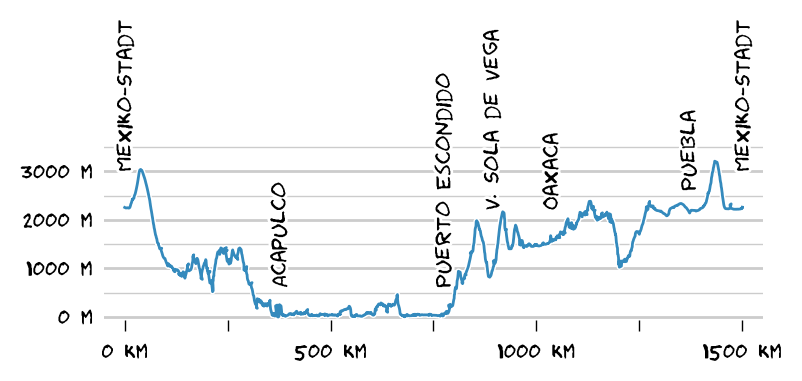

In [3]:
fig_p,ax = plt.subplots(figsize=(tm.cm2in([10.8, 5])))

# Switch off axis and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('none')

# Get data
pdat = np.loadtxt('./data/Mexico/SSTripData.txt', skiprows=1)

# Plot City names and kilometers
opt = {'horizontalalignment':'center', 'verticalalignment':'left', 'rotation':'vertical'}
plt.annotate('Mexiko-Stadt', (0, 3000), **opt)
plt.annotate('Acapulco', (373, 600), **opt)
plt.annotate('Puerto Escondido', (773, 600), **opt)
plt.annotate('V. Sola de Vega', (890, 2200), **opt)
plt.annotate('Oaxaca', (1032, 2200), **opt)
plt.annotate('Puebla', (1368, 2600), **opt)
plt.annotate('Mexiko-Stadt', (1501, 3000), **opt)

# Ticks, hlines, axis
plt.xticks(np.arange(7)*250, ('0 km', '', '500 km', '', '1000 km', '', '1500 km'))
plt.yticks(np.arange(8)*500, ('0 m', '', '1000 m', '', '2000 m', '', '3000 m', ''))
plt.hlines([0, 1000, 2000, 3000], -100, 1600, colors='.8')
plt.hlines([500, 1500, 2500, 3500], -100, 1600, colors='.8', lw=.5)
plt.axis([-50, 1550, -300, 6000])

# Sum up differences to get distance, distance starts now at every waypoint
distance = np.cumsum(pdat[:,4])/1000  # 41443 data points

# Reduce data points to 1500
reduced = interp1d(distance, pdat[:,2], 'slinear')
ndist = np.linspace(0, 1500, 1500)
nelev = reduced(ndist)

# Plot data
plt.plot(ndist, nelev)

# Save-path
#fpath = '../mexico.werthmuller.org/content/images/simon/'
#plt.savefig(fpath+'Profile.png', bbox_inches='tight')

plt.show()